<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/LINEAR_MULTIPLE_LINEAR_REGRESSION_Startup_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#SIMPLE LINEAR AND MULTIPLE LINEAR REGRESSION ASSIGNMENT
#Startup Dataset
# [https://www.kaggle.com/datasets/karthickveerakumar/startup-logistic-regression/data]
#Predict profit based on R&D Spend, Administration, Marketing Spend, and State.

#Step 1: Setup and Data Preparation
#1. Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#2. Load the Dataset
# Load the dataset
data = pd.read_csv("50_Startups.csv")

# Display first 5 rows
print(data.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
#3. Understand the Structure
# Check structure
print(data.info())

# Summary statistics
print(data.describe(include='all'))

# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print(data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
            R&D Spend  Administration  Marketing Spend     State  \
count       50.000000       50.000000        50.000000        50   
unique            NaN             NaN              NaN         3   
top               NaN             NaN              NaN  New York   
freq              NaN             NaN              NaN        17   
mean     73721.615600   121344.639600    211025.097800       NaN   
std      45902.256482    28017.802755    122290.310726       NaN   
min          0.000000    51283.140000      

In [4]:
#4. Handle Missing Values
#If there are missing values:
# Fill missing values with mean (for numerical) or mode (for categorical)
for column in data.columns:
    if data[column].isnull().any():  # Check if column has NaN values
        if data[column].dtype == 'object':  # Categorical columns
            data[column] = data[column].fillna(data[column].mode()[0])
        else:  # Numerical columns
            data[column] = data[column].fillna(data[column].mean())

In [5]:
#5. Encode Categorical Variables
#Convert the categorical variable State into numeric form using one-hot encoding.
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['State'], drop_first=True)

# Display updated dataset
print(data_encoded.head())

   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83          False   
1  162597.70       151377.59        443898.53  191792.06          False   
2  153441.51       101145.55        407934.54  191050.39           True   
3  144372.41       118671.85        383199.62  182901.99          False   
4  142107.34        91391.77        366168.42  166187.94           True   

   State_New York  
0            True  
1           False  
2           False  
3            True  
4           False  


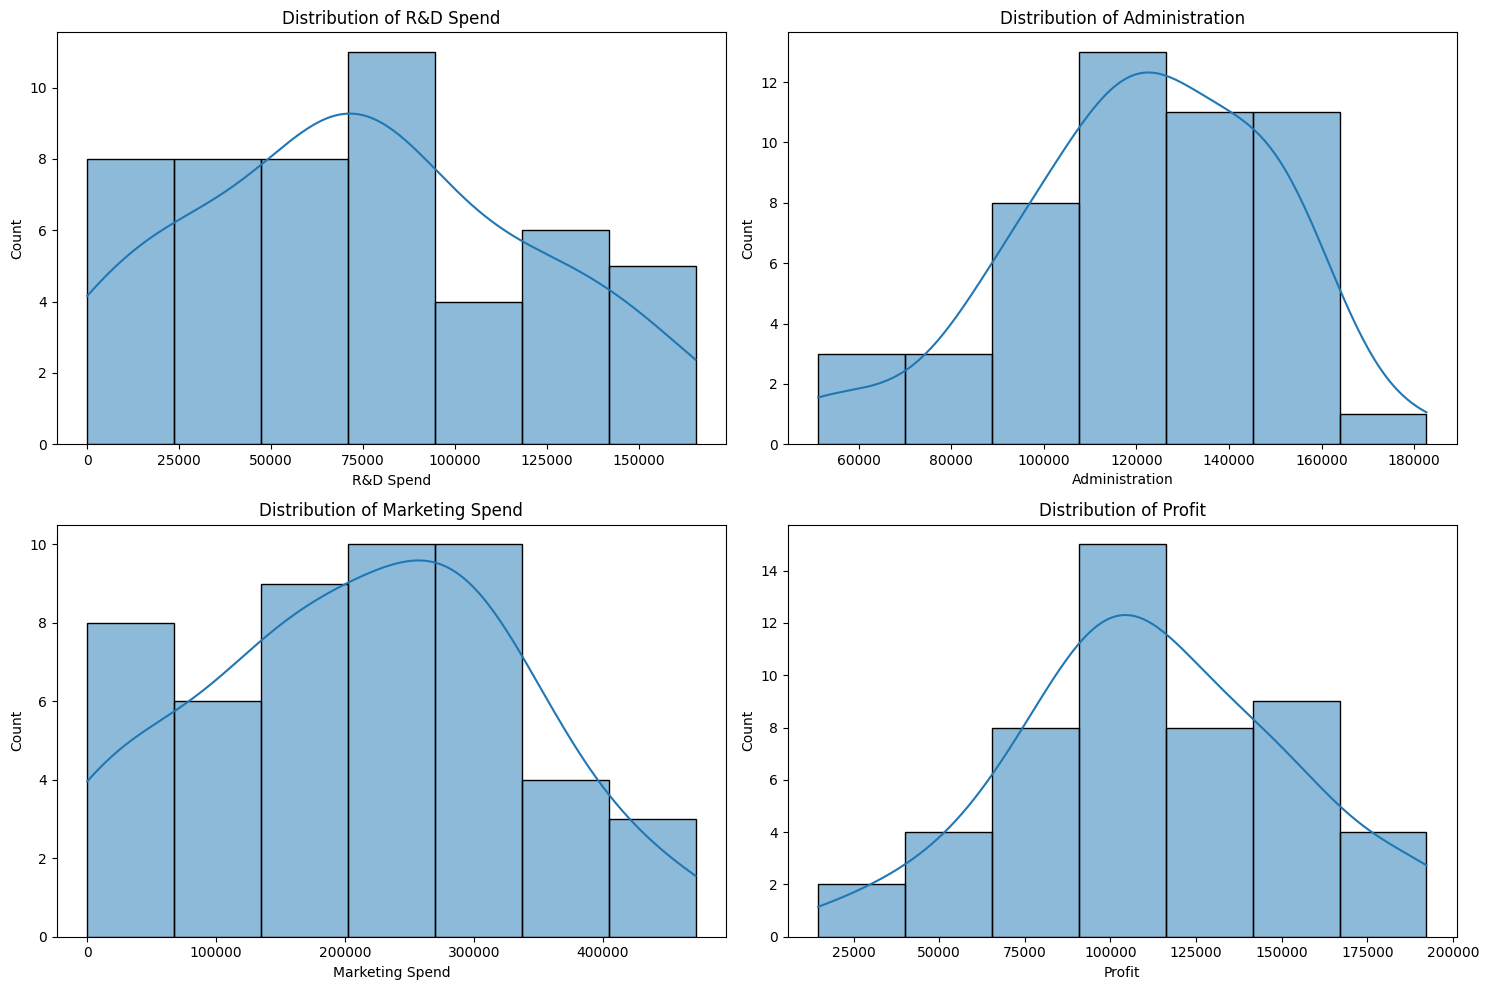

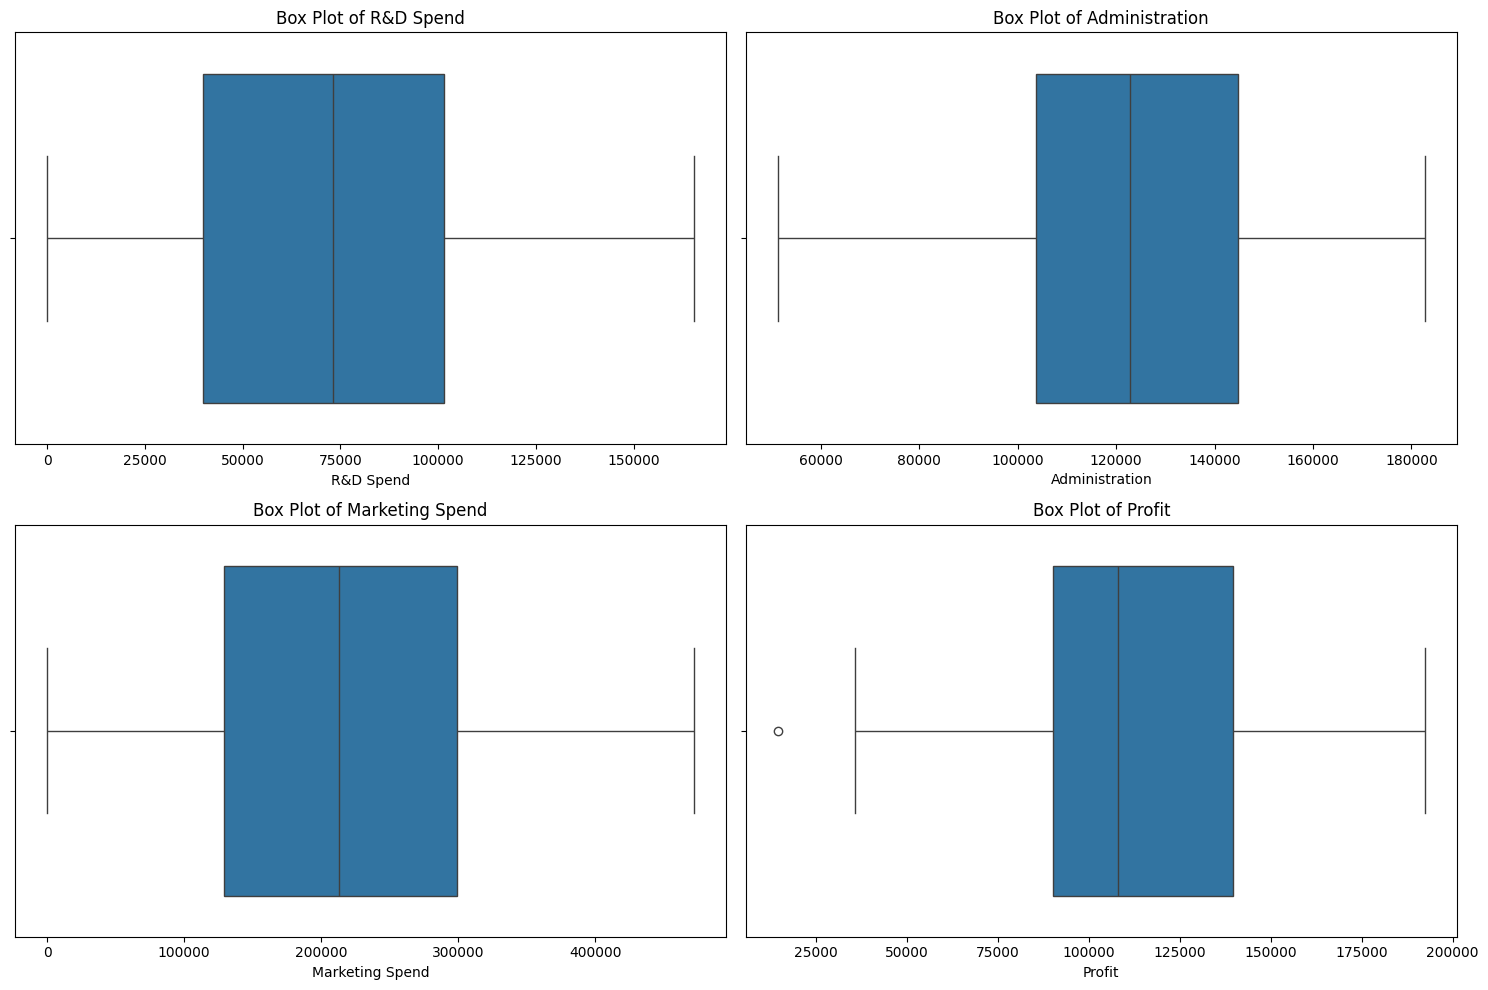

In [6]:
#Step 2: Exploratory Data Analysis (EDA)
#1. Univariate Analysis
#Analyze the distribution of individual variables.

#Numerical Columns :
# Histograms for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

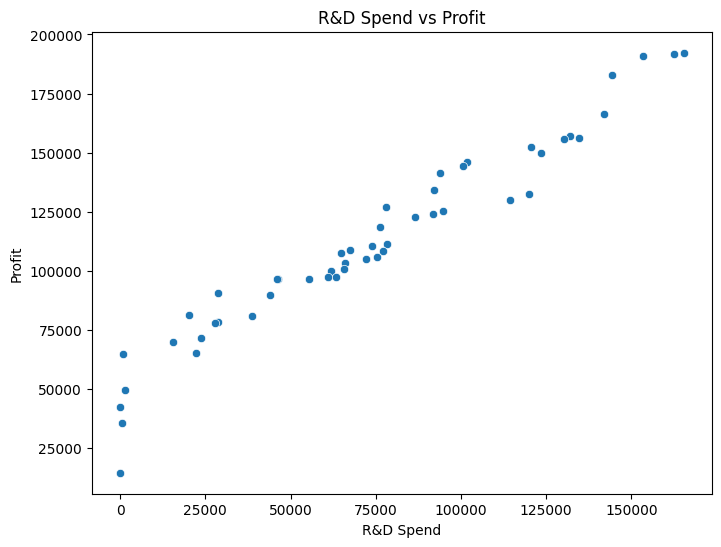

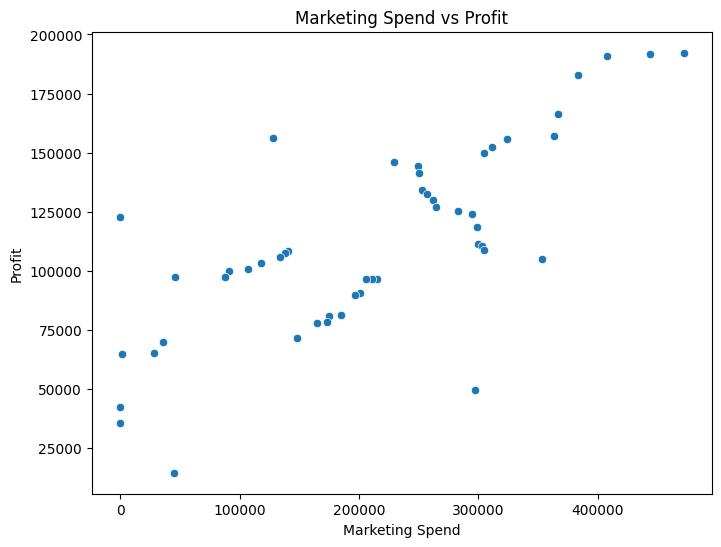

In [7]:
#2. Bivariate Analysis
#Analyze relationships between two variables.

#Scatter Plots :
# Scatter plot: R&D Spend vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='R&D Spend', y='Profit', data=data)
plt.title('R&D Spend vs Profit')
plt.show()

# Scatter plot: Marketing Spend vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing Spend', y='Profit', data=data)
plt.title('Marketing Spend vs Profit')
plt.show()

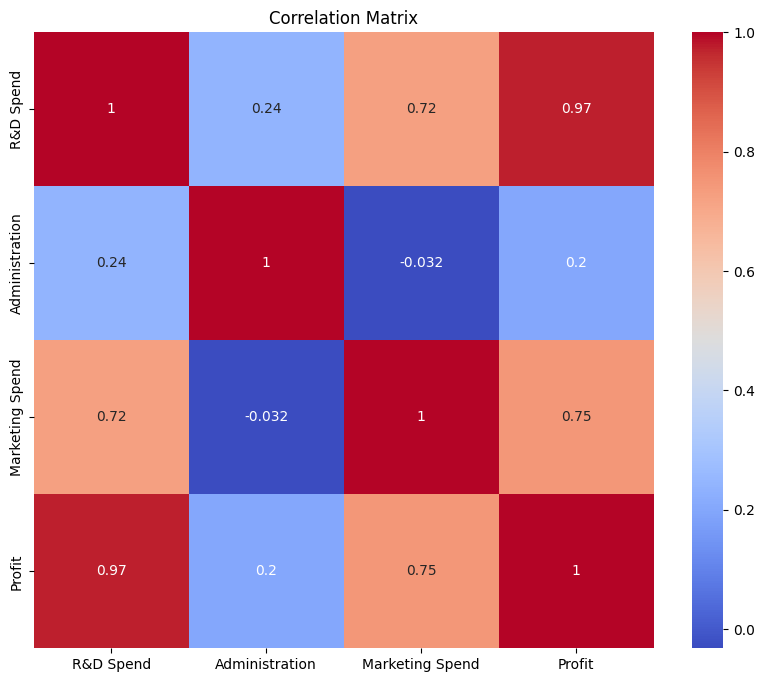

In [8]:
#3. Multivariate Analysis
#Analyze relationships between multiple variables.

#Correlation Matrix :
# Correlation matrix
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
#Step 3: Preprocessing and Feature Engineering
#1. Handle Outliers
#Detect and handle outliers using the Interquartile Range (IQR) method.

# Detect outliers using IQR
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
data_cleaned = data[~((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# Compare shapes before and after removing outliers
print("Original shape:", data.shape)
print("Cleaned shape:", data_cleaned.shape)


Original shape: (50, 5)
Cleaned shape: (49, 5)


In [12]:
#2. Scale Numerical Features
#Normalize numerical features for consistency.
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("50_Startups.csv")

# Verify column names and data types
print("Column names in the dataset:")
print(data.columns)
print("\nData types of columns:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert scaled data back to a DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Display scaled data
print("\nScaled dataset:")
print(scaled_data.head())

Column names in the dataset:
Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

Data types of columns:
R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

Scaled dataset:
   R&D Spend  Administration  Marketing Spend    Profit
0   2.016411        0.560753         2.153943  2.011203
1   1.955860        1.082807         1.923600  1.999430
2   1.754364       -0.728257         1.626528  1.980842
3   1.554784       -0.096365         1.422210  1.776627
4   1.504937       -1.079919         1.281528  1.357740



Simple Linear Regression Performance:
Mean Squared Error: 48371001.39
Mean Absolute Error: 6180.09
R-squared: 0.94


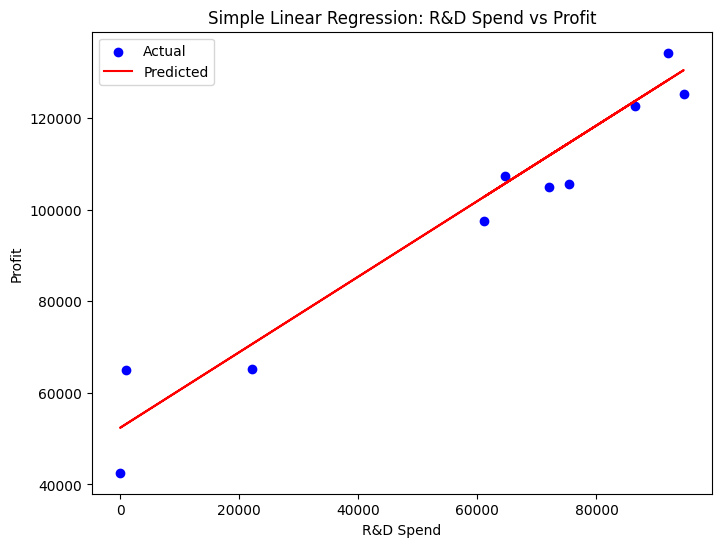

In [13]:
#Step 4: Model Construction
#1. Simple Linear Regression
#Train a model using one independent variable (e.g., R&D Spend) and one dependent variable (Profit).

# Define features (X) and target (y)
X_simple = data_cleaned[['R&D Spend']]  # Independent variable
y = data_cleaned['Profit']             # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Train a Simple Linear Regression model
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

# Make predictions
y_pred_simple = model_simple.predict(X_test)

# Evaluate the model
mse_simple = mean_squared_error(y_test, y_pred_simple)
mae_simple = mean_absolute_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)

print("\nSimple Linear Regression Performance:")
print(f"Mean Squared Error: {mse_simple:.2f}")
print(f"Mean Absolute Error: {mae_simple:.2f}")
print(f"R-squared: {r2_simple:.2f}")

# Visualize the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_simple, color='red', label='Predicted')
plt.title('Simple Linear Regression: R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.legend()
plt.show()


In [14]:
#2. Multiple Linear Regression
#Train a model using multiple independent variables (e.g., R&D Spend, Administration, Marketing Spend, State) and one dependent variable (Profit).
# Define features (X) and target (y)
X_multiple = data_encoded.drop('Profit', axis=1)  # Independent variables
y = data_encoded['Profit']                        # Dependent variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

# Train a Multiple Linear Regression model
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test)

# Evaluate the model
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression Performance:")
print(f"Mean Squared Error: {mse_multiple:.2f}")
print(f"Mean Absolute Error: {mae_multiple:.2f}")
print(f"R-squared: {r2_multiple:.2f}")

# Interpret coefficients
coefficients = pd.Series(model_multiple.coef_, index=X_multiple.columns)
print("\nCoefficients:")
print(coefficients)



Multiple Linear Regression Performance:
Mean Squared Error: 82010363.04
Mean Absolute Error: 6961.48
R-squared: 0.90

Coefficients:
R&D Spend            0.805630
Administration      -0.068788
Marketing Spend      0.029855
State_Florida      938.793006
State_New York       6.987760
dtype: float64


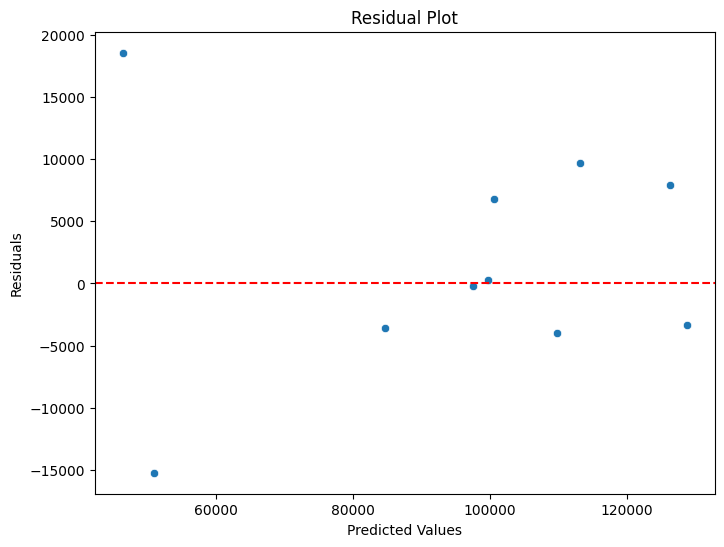

In [15]:
#Step 5: Residual Analysis
#Residual Plot
# Residual plot for Multiple Linear Regression
residuals = y_test - y_pred_multiple
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred_multiple, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

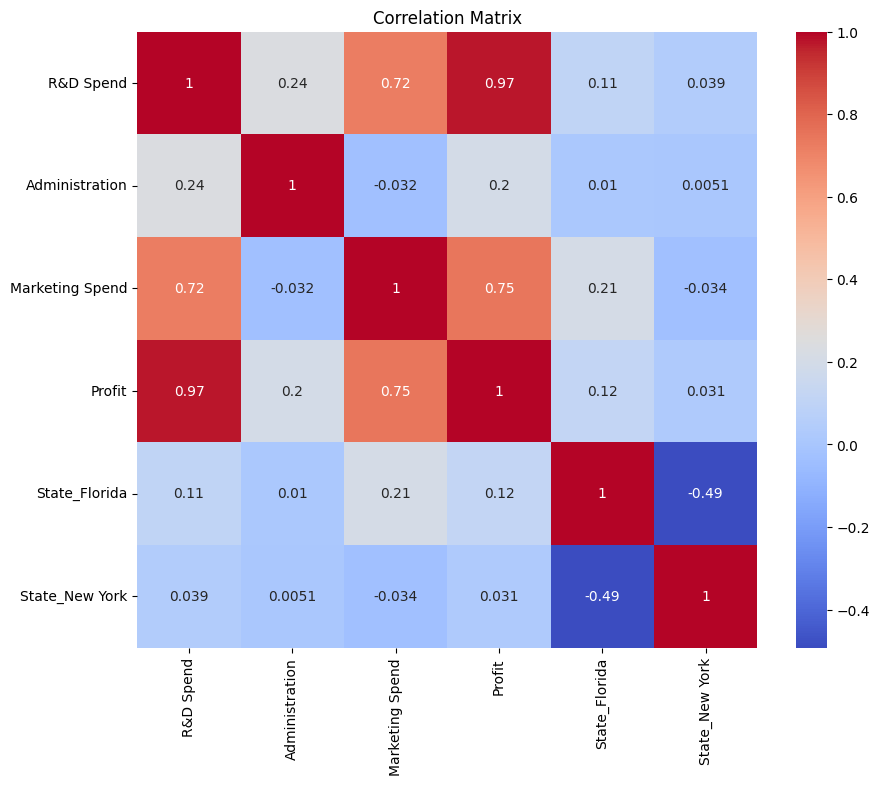

In [16]:
#Step 6: Model Optimization and Insights
#Feature Selection
#Remove irrelevant or highly correlated predictors to improve the model's performance.
# Analyze correlation matrix

correlation_matrix = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()